# Week06 Decision Trees, Bayesian Classifer

---
p14

# 1. Decision Tree Learning with Scikit-learn

### Load Iris Dataset

In [35]:
!pip install scikit-learn

In [36]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# use features 2 and 3 only
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Splitting data into 70% training data & 30% test data

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [38]:
X_train[:3]

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3]])

In [39]:
y_train

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [40]:
X_test[:3]

array([[5.4, 2.3],
       [1.7, 0.4],
       [1.4, 0.3]])

In [41]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [42]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


---
p15

### Entropy and Gini Impurity

/Users/seonjin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log2
  # Remove the CWD from sys.path while we load stuff.
/Users/seonjin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


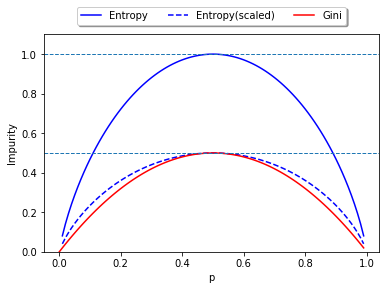

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# compute Gini
def gini(p):
    return p * (1-p) + (1-p) * (1-(1-p))

# compute Entropy
def entropy(p):
    return -(p * np.log2(p) + (1-p) * np.log2((1-p))) 

p = np.arange(0.0, 1.0, 0.01)

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([entropy(p), entropy(p)*0.5, gini(p)], 
                          ['Entropy', 'Entropy(scaled)', 'Gini'],
                          ['-', '--', '-'],
                          ['blue', 'blue', 'red']):
    line = ax.plot(p, i, label=lab, linestyle=ls, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=True)
ax.axhline(y=0.5, linewidth=1, linestyle='--')
ax.axhline(y=1.0, linewidth=1, linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p')
plt.ylabel('Impurity')
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

---
p16

### Learning Decision Tree 

In [44]:
from sklearn.tree import DecisionTreeClassifier

# learn decision tree with training dataset
tree = DecisionTreeClassifier(criterion='gini', random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

---
p17

### Model evaluation

In [45]:
X_test[10:15]

array([[1.5, 0.4],
       [4.9, 1.8],
       [1.4, 0.2],
       [3.3, 1. ],
       [1.4, 0.2]])

In [46]:
y_test[10:15]

array([0, 2, 0, 1, 0])

In [47]:
# predict class of X_test[10] ~ X_test[14]
tree.predict(X_test[10:15])

array([0, 2, 0, 1, 0])

In [48]:
# Compute train accuracy
acc = tree.score(X_train, y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.9904761904761905


In [49]:
# Compute test accuracy
acc = tree.score(X_test, y_test)
print("Test Accuracy : ", acc)

Test Accuracy :  0.9777777777777777


---
p18

### Visualizing the model

In [50]:
from sklearn.tree import plot_tree #scikit-learn >= 22.0

# plot the tree
plt.figure(figsize=(10,10))
plot_tree(tree, filled=True, rounded=True)

ImportError: cannot import name 'plot_tree' from 'sklearn.tree' (/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/tree/__init__.py)

---
p19

### Plotting the decision boundary

In [51]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

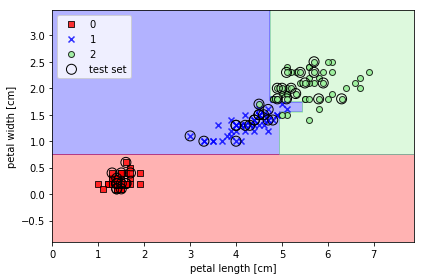

In [52]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---
p20

### Building Decision Tree with max depth

In [55]:
from sklearn.tree import DecisionTreeClassifier

# learn decision tree of depth 2
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

---
p21

### Model evaluation

In [56]:
# Compute train accuracy
acc = tree.score(X_train, y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.9523809523809523


In [57]:
# Compute test accuracy
acc = tree.score(X_test, y_test)
print("Test Accuracy : ", acc)

Test Accuracy :  0.9555555555555556


### Visualizing the model

In [59]:
from sklearn.tree import plot_tree

# plot the tree
plot_tree(tree, filled=True, rounded=True)

ImportError: cannot import name 'plot_tree' from 'sklearn.tree' (/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/tree/__init__.py)

---
p22

### Plotting the decision boundary

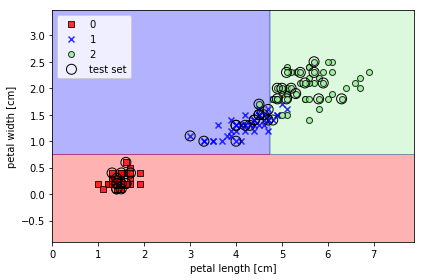

In [60]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---
p26

# 2. Naïve Bayesian Classifier Using Scikit-learn
### Load Iris Dataset

In [61]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# use features 2 and 3 only
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Splitting data into 70% training data & 30% test data

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [64]:
X_train[:3]

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3]])

In [65]:
y_train

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [66]:
X_test[:3]

array([[5.4, 2.3],
       [1.7, 0.4],
       [1.4, 0.3]])

In [67]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [68]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


---
p27-28

### Learning Gaussian Naïve Bayes Classifier

In [70]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Model evaluation

In [71]:
X_test[10:15]

array([[1.5, 0.4],
       [4.9, 1.8],
       [1.4, 0.2],
       [3.3, 1. ],
       [1.4, 0.2]])

In [72]:
y_test[10:15]

array([0, 2, 0, 1, 0])

In [74]:
# predict class of X_test[10] ~ X_test[14]
gnb.predict(X_test[10:15])

array([0, 2, 0, 1, 0])

In [75]:
# predict class probabilty of X_test[10] ~ X_test[14]
gnb.predict_proba(X_test[10:15])

array([[1.00000000e+000, 2.31526477e-013, 1.00135144e-019],
       [1.22001111e-137, 1.24130788e-001, 8.75869212e-001],
       [1.00000000e+000, 9.79774424e-017, 9.37180646e-023],
       [1.33678957e-034, 9.99993914e-001, 6.08569557e-006],
       [1.00000000e+000, 9.79774424e-017, 9.37180646e-023]])

In [76]:
# Compute train accuracy
acc = gnb.score(X_train, y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.9523809523809523


In [77]:
# Compute test accuracy
acc = gnb.score(X_test, y_test)
print("Test Accuracy : ", acc)

Test Accuracy :  0.9777777777777777


---
p29

### Plotting the decision boundary

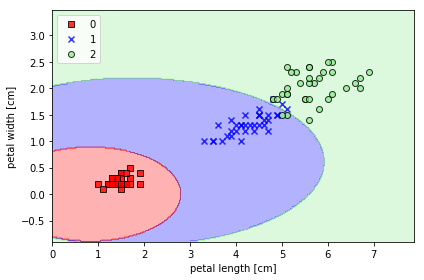

In [78]:
from sklearn.naive_bayes import GaussianNB

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_train, y_train, 
                    classifier=gnb)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---
p30

# Submit
- To make sure if you have completed this practice, Submit your practice file(Week06_givencode.ipynb) to e-class.
- **Deadline : tomorrow 11:59pm**
- Modify your ipynb file name as **“Week06_StudentNum_Name.ipynb”**
  - ```Ex) Week06_2020123456_홍길동.ipynb``` 
- You can upload this file without taking the quiz, but **homework is provided like a quiz every three weeks**, so it is recommended to take the quiz as well.

---
p31

# Quiz 1 : Decision Tree 

## Learn decision tree model for Heart Diseases classification using heart_disease.csv dataset
- **Dataset information** : https://archive.ics.uci.edu/ml/datasets/heart+Disease
- Use all 297 samples, all 13 features
- Label : The feature 'num' refers to the presence of heart disease in the patient(from 0 to 4). We will convert values 2, 3, 4 to 1(to do binary classification)
- Use 70% of dataset for training, 30% for testing
- Find the smallest tree among the trees that show highest test accuracy
- Visualize the tree, and compute the accuracies
- Predict the class of following data
            [[52, 2, 5, 135, 250, 0, 3, 180, 1, 0, 1, 0, 2]]

### Loading Heart Desease Dataset

In [321]:
import pandas as pd
import numpy as np

In [322]:
hd = None
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [323]:
hd.shape

(297, 14)

In [324]:
hd['num'] = np.where(hd['num'] > 0, 1, 0)
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [325]:
# Make X, y using all features
X = None
y = None
print('Class labels:', np.unique(y))

Class labels: [0 1]


### Splitting data 

In [326]:
from sklearn.model_selection import train_test_split

None

### Learning Decision Tree

In [327]:
from sklearn.tree import DecisionTreeClassifier

tree = None
None

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

### Visualizing the model

[Text(167.4, 190.26, 'X[12] <= 4.5\nentropy = 0.497\nsamples = 207\nvalue = [112, 95]'),
 Text(83.7, 135.9, 'X[2] <= 3.5\nentropy = 0.326\nsamples = 117\nvalue = [93, 24]'),
 Text(41.85, 81.53999999999999, 'X[9] <= 3.1\nentropy = 0.178\nsamples = 81\nvalue = [73, 8]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.16\nsamples = 80\nvalue = [73, 7]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[11] <= 0.5\nentropy = 0.494\nsamples = 36\nvalue = [20, 16]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(251.10000000000002, 135.9, 'X[9] <= 0.45\nentropy = 0.333\nsamples = 90\nvalue = [19, 71]'),
 Text(209.25, 81.53999999999999, 'X[7] <= 140.5\nentropy = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 

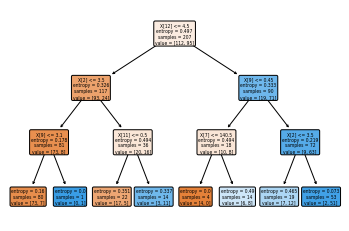

In [328]:
from sklearn.tree import plot_tree

None

### Model evaluation

In [329]:
# Compute train accuracy
None

Train Accuracy :  0.855072463768116


In [330]:
# Compute test accuracy
None

Test Accuracy :  0.7444444444444445


### Classification of new data

In [331]:
# predict class 
None

array([0])

---
p32

# Quiz 2 : Naïve Bayesian Classifier
## Learn Naïve Bayesian Classifier using heart_disease.csv dataset
- **Dataset information** : https://archive.ics.uci.edu/ml/datasets/heart+Disease
- Use the same training and test dataset of Quiz 1
- Compute the accuracies of the classifier
- Predict the class of following data with probability
            [[52, 2, 5, 135, 250, 0, 3, 180, 1, 0, 1, 0, 2]]

### Learning Gaussian Naïve Bayes Classifier

In [332]:
from sklearn.naive_bayes import GaussianNB

gnb = None
None

GaussianNB(priors=None, var_smoothing=1e-09)

### Model evaluation

In [333]:
# Compute train accuracy
None

Train Accuracy :  0.8405797101449275


In [334]:
# Compute test accuracy
None

Test Accuracy :  0.8555555555555555


### Classification of new data

In [335]:
# predict class 
None

array([0])

In [336]:
# predict class probabilty 
None

array([[0.85577649, 0.14422351]])